In [1]:
import os
os.chdir('C:\\Users\johannes\ProjectAmazonTextAnalysis\johannes')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [78]:
X_train = pd.read_pickle('X_train.pkl')
X_test = pd.read_pickle('X_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')


X_train.head()

,considerably,communicate,fixed,ideal,remembered,invested,distort,perspective,rom,v2,...,"('a', 'more')","('for', 'over')","('to', '.')","('light', ',')","('and', 'all')","('love', 'this')","('a', 'must')","('my', 'lens')","('got', 'it')",review_lenght
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25


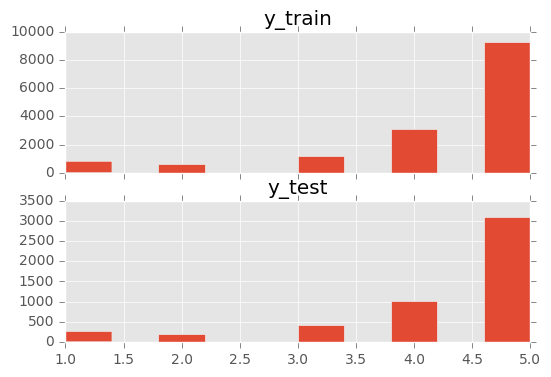

In [5]:
fig, ax = plt.subplots(2, sharex = True)
ax[0].hist(y_train)
ax[0].set_title('y_train')

ax[1].hist(y_test)
ax[1].set_title('y_test')
plt.show()

In [22]:
# from ggplot import *
# g = ggplot(aes(x = 'review_labels'), data =  pd.DataFrame(y_test))
# g + geom_histogram()

In [79]:
full_train_dataset = pd.concat([X_train, y_train], axis = 1)
full_train_dataset.dropna(inplace = True)

full_test_dataset = pd.concat([X_test, y_test], axis = 1)
full_test_dataset.dropna(inplace = True)

y_train = full_train_dataset['review_labels']
X_train = full_train_dataset.drop('review_labels', axis = 1)

y_test = full_test_dataset['review_labels']
X_test = full_test_dataset.drop('review_labels', axis = 1)

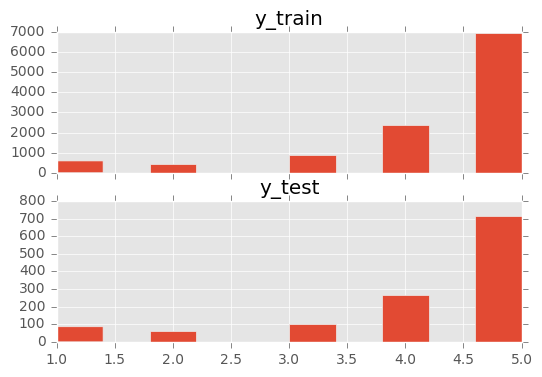

In [24]:
fig, ax = plt.subplots(2, sharex = True)
ax[0].hist(y_train)
ax[0].set_title('y_train')

ax[1].hist(y_test)
ax[1].set_title('y_test')
plt.show()

In [25]:
# from pandas.tools.plotting import radviz
# plt.figure()
# radviz(full_train_dataset, 'review_labels')
# plt.show()

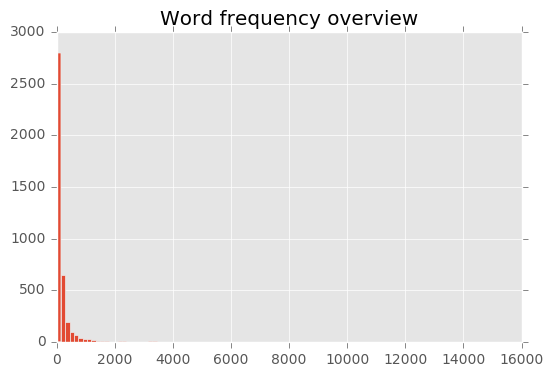

In [26]:
plt.hist(X_train.drop('review_lenght', axis = 1).sum(), bins=100)
plt.title('Word frequency overview')
# plt.xlim(15000,20000)
plt.show()

In [27]:
# Total word representation
X_train.sum().sort_values(ascending=False)[1:10]

this          14967.0
that          12232.0
in            12114.0
with          11534.0
('.', 'i')     9738.0
have           9636.0
not            7722.0
n't            7377.0
)              7059.0
dtype: float64

In [28]:
# Look at the average word representation
X_train.mean().sort_values(ascending=False)[0:10]

review_lenght    118.887484
this               1.332295
that               1.088837
in                 1.078334
with               1.026705
('.', 'i')         0.866833
have               0.857753
not                0.687378
n't                0.656667
)                  0.628360
dtype: float64

In [29]:
# Checking the lenght of reviews variable in connection with product score. 
grp = full_train_dataset.groupby('review_labels')
grp_mean = grp.mean().review_lenght
grp_mean

review_labels
1.0    120.940678
2.0    108.632159
3.0    113.620767
4.0    119.357264
5.0    119.896482
Name: review_lenght, dtype: float64

In [15]:
# Score distribution
grp = full_train_dataset.groupby('review_labels').size()
grp

review_labels
1.0     590
2.0     454
3.0     886
4.0    2368
5.0    6936
dtype: int64

In [31]:
# Checking the frequency of words in connection with score
# grp = full_train_dataset.groupby('review_labels')
# for i in range(5):
#     grp.get_group(i)

In [33]:
def good_text_frequency(df = X_train, upper_limit = 0.1, lower_limit = 0.001):    
    tokens = df.columns.values[:-1]
    indicators = df.iloc[:,:-1].apply(lambda x: x > 0)
    bool = [lower_limit < value < upper_limit for value in indicators.mean().values]
    good_tokens = tokens[bool]
    token_df = df[good_tokens]
    non_tokens = df.iloc[:,-1:].columns.values
    # token_df[non_tokens] = df.iloc[:,-1:].values
    df = token_df
    return df
tokens = good_text_frequency()
print(tokens.shape)
tokens.head()

(11234, 3043)


,considerably,communicate,fixed,ideal,invested,distort,perspective,rom,counts,recycle,...,"('my', 'head')","('a', 'more')","('for', 'over')","('to', '.')","('light', ',')","('and', 'all')","('love', 'this')","('a', 'must')","('my', 'lens')","('got', 'it')"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Checking which words that are regular in the 5-star ratings but not regular in the one star ratings. 
grp = pd.concat((tokens, y_train), axis =1).groupby('review_labels')
common_5_star_words = grp.get_group(5).sum().sort_values(ascending=False)[:100].index
common_1_star_words = grp.get_group(1).sum().sort_values(ascending=False)[:100].index

uncommon = [word for word in common_5_star_words if not word in common_1_star_words]
uncommon

['without',
 'we',
 "('in', 'a')",
 "('on', 'my')",
 'should',
 "(')', ',')",
 "('the', 'same')",
 "('it', 'does')",
 "('from', 'the')",
 'router',
 'before',
 "('i', 'use')",
 "'ll",
 "('it', 'to')",
 'found',
 '(\'does\', "n\'t")',
 "('a', 'few')"]

In [38]:
# Combining 1, 2 and 3 star as one group
grp = pd.concat((tokens, y_train), axis =1).groupby('review_labels')
bad_grp = pd.concat((grp.get_group(1),grp.get_group(2),grp.get_group(3)), axis = 0)
print(bad_grp.shape)

bad_grp.sum().sort_values(ascending=False)[:10]

(1930, 3044)


review_labels    4156.0
&                 453.0
headphones        378.0
-                 351.0
''                267.0
then              244.0
``                238.0
power             223.0
('but', 'i')      223.0
computer          222.0
dtype: float64

In [288]:
# Splitting the data

X = tokens
y = y_train.values

X_len = X.shape[0]
train_index = np.random.choice(np.arange(X_len),size = int(0.8*X_len), replace=False)
test_index = [value for value in np.arange(X_len) if value not in train_index]

_X_train, _X_test, _y_train, _y_test = X.iloc[train_index,:], X.iloc[test_index, :], y[train_index], y[test_index]
# X_train, X_test, y_train, y_test = train_test_split(X, y)
print(_X_train.shape, _X_test.shape, _y_train.shape, _y_test.shape)

_y_test = np.array([int(i) for i in _y_test])
_y_train = np.array([int(i) for i in _y_train])

(8987, 3043) (2247, 3043) (8987,) (2247,)


In [289]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Model tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
# Dimentionality reduction
from sklearn.decomposition import PCA
# Performance metrics
from sklearn.metrics import confusion_matrix


pipe = Pipeline([('scale', MinMaxScaler()), ('clf', LogisticRegression())])

pipe.fit(_X_train, _y_train)
pred = pipe.predict(_X_test)
acc = np.mean(pred == _y_test)
mse = np.mean((pred - _y_test)**2)

print('Accuracy:', acc)
print('MSE:', mse)

Accuracy: 0.580329327993
MSE: 1.67111704495


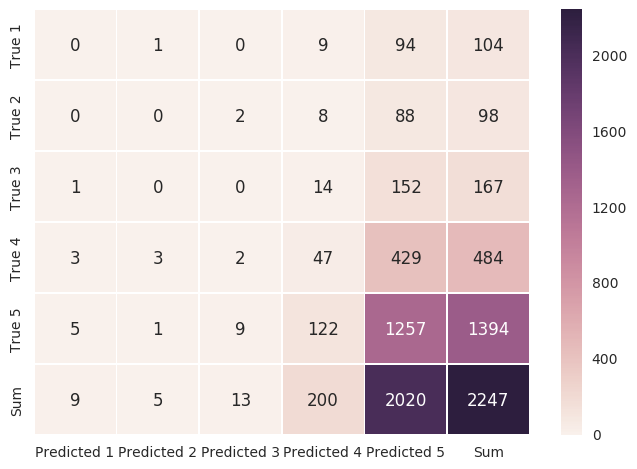

In [290]:
import seaborn as sn

classes = ['1','2','3','4','5']
cm = np.array(confusion_matrix(_y_test, pred))

def plot_confusion(confusion_matrix=cm, classes = ['1','2','3','4','5']):
    def add_sums(confusion_matrix):
        vertical_sum = np.array([np.sum(confusion_matrix, axis = 0)])
        horizontal_sum = np.sum(confusion_matrix, axis = 1)
        total_sum = np.sum(vertical_sum)
        
        horizontal_sum = np.array([np.append(horizontal_sum, total_sum)])
        confusion_matrix = np.concatenate((confusion_matrix, vertical_sum), axis = 0)
        confusion_matrix = np.concatenate((confusion_matrix, horizontal_sum.T), axis = 1)
        return confusion_matrix
        
    index = ['True'+' '+ i for i in classes] + ['Sum']
    columns = ['Predicted'+' '+i for i in classes] + ['Sum']
    
    df_cm = pd.DataFrame(add_sums(confusion_matrix), index = index,
                      columns = columns)
    sn.heatmap(df_cm, annot=True, fmt = 'd', linewidths=0.5)
    plt.show()
plot_confusion()

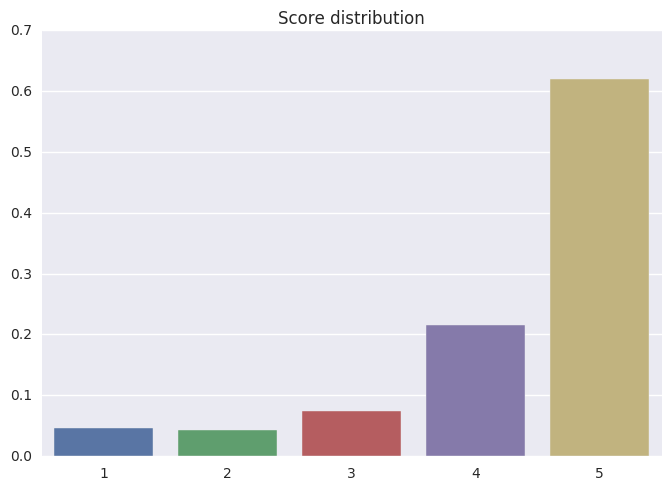

P(1): 0.0462839341344
P(2): 0.0436137071651
P(3): 0.074321317312
P(4): 0.215398308856
P(5): 0.620382732532


In [291]:
# Checking the score distribution
def add_sums(confusion_matrix = cm):
        vertical_sum = np.array([np.sum(confusion_matrix, axis = 0)])
        horizontal_sum = np.sum(confusion_matrix, axis = 1)
        total_sum = np.sum(vertical_sum)
        
        horizontal_sum = np.array([np.append(horizontal_sum, total_sum)])
        confusion_matrix = np.concatenate((confusion_matrix, vertical_sum), axis = 0)
        confusion_matrix = np.concatenate((confusion_matrix, horizontal_sum.T), axis = 1)
        return confusion_matrix
sums = add_sums()[:,-1]

score_distribution= [i/sums[-1] for i in sums][:-1]

sn.barplot(x = [1,2,3,4,5], y = score_distribution)
plt.title('Score distribution')
plt.show()
for i in range(len(score_distribution)):
    print('P('+str(i+1)+'):', score_distribution[i])

In [292]:
forest = RandomForestClassifier()
forest_pipe = Pipeline([('clf', RandomForestClassifier())])
param_grid = [{'clf__n_estimators': [2**i for i in range(5)], 'clf__criterion':['gini']}, 
              {'clf__n_estimators': [2**i for i in range(5)], 'clf__criterion':['entropy']}]
gs = GridSearchCV(estimator=forest_pipe, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs = -1)
gs.fit(_X_train, _y_train)
print(gs.best_score_)
print(gs.best_params_)
best_clf = gs.best_estimator_

TypeError: Expected sequence or array-like, got estimator        considerably  communicate  fixed  ideal  invested  distort  \
7723            0.0          0.0    0.0    0.0       0.0      0.0   
14424           0.0          0.0    0.0    0.0       0.0      0.0   
972             0.0          0.0    0.0    0.0       0.0      0.0   
377             0.0          0.0    0.0    0.0       0.0      0.0   
2895            0.0          0.0    0.0    0.0       0.0      0.0   
3220            0.0          0.0    0.0    0.0       0.0      0.0   
11581           0.0          0.0    0.0    0.0       0.0      0.0   
1080            0.0          0.0    0.0    0.0       0.0      0.0   
7002            0.0          0.0    0.0    0.0       0.0      0.0   
6871            0.0          0.0    0.0    0.0       0.0      0.0   
10930           0.0          0.0    0.0    0.0       0.0      0.0   
11101           0.0          0.0    0.0    0.0       0.0      0.0   
7907            0.0          0.0    0.0    0.0       0.0      0.0   
5025            0.0          0.0    0.0    0.0       0.0      0.0   
13715           0.0          0.0    0.0    0.0       0.0      0.0   
7324            0.0          0.0    0.0    0.0       0.0      0.0   
7851            0.0          0.0    0.0    0.0       0.0      0.0   
5373            0.0          0.0    0.0    0.0       0.0      0.0   
12244           0.0          0.0    0.0    0.0       0.0      0.0   
13110           0.0          0.0    0.0    0.0       0.0      0.0   
14300           0.0          0.0    0.0    0.0       0.0      0.0   
11748           0.0          0.0    0.0    0.0       0.0      0.0   
4091            0.0          0.0    0.0    0.0       0.0      0.0   
9931            0.0          0.0    0.0    0.0       0.0      0.0   
1300            0.0          0.0    0.0    0.0       0.0      0.0   
5694            0.0          0.0    0.0    0.0       0.0      0.0   
9593            0.0          0.0    0.0    0.0       0.0      0.0   
14975           0.0          0.0    0.0    0.0       0.0      0.0   
4508            0.0          0.0    0.0    0.0       0.0      0.0   
6114            0.0          0.0    0.0    0.0       0.0      0.0   
...             ...          ...    ...    ...       ...      ...   
8215            0.0          0.0    0.0    0.0       0.0      0.0   
4548            0.0          0.0    0.0    0.0       0.0      0.0   
169             0.0          0.0    0.0    0.0       0.0      0.0   
4309            0.0          0.0    0.0    0.0       0.0      0.0   
1568            0.0          0.0    0.0    0.0       0.0      0.0   
12882           0.0          0.0    0.0    0.0       0.0      0.0   
11370           0.0          0.0    0.0    0.0       0.0      0.0   
1034            0.0          0.0    0.0    0.0       0.0      0.0   
8834            0.0          0.0    0.0    0.0       0.0      0.0   
8970            0.0          0.0    0.0    0.0       0.0      0.0   
3850            0.0          0.0    0.0    0.0       0.0      0.0   
9268            0.0          0.0    0.0    0.0       0.0      0.0   
13170           0.0          0.0    0.0    0.0       0.0      0.0   
8157            0.0          0.0    0.0    0.0       0.0      0.0   
12956           0.0          0.0    0.0    0.0       0.0      0.0   
7624            0.0          0.0    0.0    0.0       0.0      0.0   
5487            0.0          0.0    0.0    0.0       0.0      0.0   
4192            0.0          0.0    0.0    0.0       0.0      0.0   
11175           0.0          0.0    0.0    0.0       0.0      0.0   
13124           0.0          0.0    0.0    0.0       0.0      0.0   
5474            0.0          0.0    0.0    0.0       0.0      0.0   
7975            0.0          0.0    0.0    0.0       0.0      0.0   
9500            0.0          0.0    0.0    0.0       0.0      0.0   
2830            0.0          0.0    0.0    0.0       0.0      0.0   
14890           0.0          0.0    0.0    0.0       0.0      0.0   
7226            0.0          0.0    0.0    0.0       0.0      0.0   
4071            0.0          0.0    0.0    0.0       0.0      0.0   
4100            0.0          0.0    0.0    0.0       0.0      0.0   
7414            0.0          0.0    0.0    0.0       0.0      0.0   
9002            0.0          0.0    0.0    0.0       0.0      0.0   

       perspective  rom  counts  recycle      ...        ('my', 'head')  \
7723           0.0  0.0     0.0      0.0      ...                   0.0   
14424          0.0  0.0     0.0      0.0      ...                   0.0   
972            0.0  0.0     0.0      0.0      ...                   0.0   
377            0.0  0.0     0.0      0.0      ...                   0.0   
2895           0.0  0.0     0.0      0.0      ...                   0.0   
3220           0.0  0.0     0.0      0.0      ...                   0.0   
11581          0.0  0.0     0.0      0.0      ...                   0.0   
1080           0.0  0.0     0.0      0.0      ...                   0.0   
7002           0.0  0.0     0.0      0.0      ...                   0.0   
6871           0.0  0.0     0.0      0.0      ...                   0.0   
10930          0.0  0.0     0.0      0.0      ...                   0.0   
11101          0.0  0.0     0.0      0.0      ...                   0.0   
7907           0.0  0.0     0.0      0.0      ...                   0.0   
5025           0.0  0.0     0.0      0.0      ...                   0.0   
13715          0.0  0.0     0.0      0.0      ...                   0.0   
7324           0.0  0.0     0.0      0.0      ...                   0.0   
7851           0.0  0.0     0.0      0.0      ...                   0.0   
5373           0.0  0.0     0.0      0.0      ...                   0.0   
12244          0.0  0.0     0.0      0.0      ...                   0.0   
13110          0.0  0.0     0.0      0.0      ...                   0.0   
14300          0.0  0.0     0.0      0.0      ...                   0.0   
11748          0.0  0.0     0.0      0.0      ...                   0.0   
4091           0.0  0.0     0.0      0.0      ...                   0.0   
9931           0.0  0.0     0.0      0.0      ...                   0.0   
1300           0.0  0.0     0.0      0.0      ...                   0.0   
5694           0.0  0.0     0.0      0.0      ...                   0.0   
9593           0.0  0.0     0.0      0.0      ...                   0.0   
14975          0.0  0.0     0.0      0.0      ...                   0.0   
4508           0.0  0.0     0.0      0.0      ...                   0.0   
6114           0.0  0.0     0.0      0.0      ...                   0.0   
...            ...  ...     ...      ...      ...                   ...   
8215           0.0  0.0     0.0      0.0      ...                   0.0   
4548           0.0  0.0     0.0      0.0      ...                   0.0   
169            0.0  0.0     0.0      0.0      ...                   0.0   
4309           0.0  0.0     0.0      0.0      ...                   0.0   
1568           0.0  0.0     0.0      0.0      ...                   0.0   
12882          0.0  0.0     0.0      0.0      ...                   0.0   
11370          0.0  0.0     0.0      0.0      ...                   0.0   
1034           0.0  0.0     0.0      0.0      ...                   0.0   
8834           0.0  0.0     0.0      0.0      ...                   0.0   
8970           0.0  0.0     0.0      0.0      ...                   0.0   
3850           0.0  0.0     0.0      0.0      ...                   0.0   
9268           0.0  0.0     0.0      0.0      ...                   0.0   
13170          0.0  0.0     0.0      0.0      ...                   0.0   
8157           0.0  0.0     0.0      0.0      ...                   0.0   
12956          0.0  0.0     0.0      0.0      ...                   0.0   
7624           0.0  0.0     0.0      0.0      ...                   0.0   
5487           0.0  0.0     0.0      0.0      ...                   0.0   
4192           0.0  0.0     0.0      0.0      ...                   0.0   
11175          0.0  0.0     0.0      0.0      ...                   0.0   
13124          0.0  0.0     0.0      0.0      ...                   0.0   
5474           0.0  0.0     0.0      0.0      ...                   0.0   
7975           0.0  0.0     0.0      0.0      ...                   0.0   
9500           0.0  0.0     0.0      0.0      ...                   0.0   
2830           0.0  0.0     0.0      0.0      ...                   0.0   
14890          0.0  0.0     0.0      0.0      ...                   0.0   
7226           0.0  0.0     0.0      0.0      ...                   0.0   
4071           0.0  0.0     0.0      0.0      ...                   0.0   
4100           0.0  0.0     0.0      0.0      ...                   0.0   
7414           0.0  0.0     0.0      0.0      ...                   0.0   
9002           0.0  0.0     0.0      0.0      ...                   1.0   

       ('a', 'more')  ('for', 'over')  ('to', '.')  ('light', ',')  \
7723             0.0              0.0          0.0             0.0   
14424            0.0              0.0          0.0             0.0   
972              0.0              0.0          0.0             0.0   
377              0.0              0.0          0.0             0.0   
2895             0.0              0.0          0.0             0.0   
3220             0.0              0.0          0.0             0.0   
11581            0.0              0.0          0.0             0.0   
1080             0.0              0.0          0.0             0.0   
7002             0.0              0.0          0.0             0.0   
6871             0.0              0.0          0.0             0.0   
10930            0.0              1.0          0.0             0.0   
11101            0.0              0.0          0.0             0.0   
7907             0.0              0.0          0.0             0.0   
5025             0.0              0.0          0.0             0.0   
13715            0.0              0.0          0.0             0.0   
7324             0.0              0.0          0.0             0.0   
7851             0.0              0.0          0.0             0.0   
5373             0.0              0.0          0.0             0.0   
12244            0.0              0.0          0.0             0.0   
13110            0.0              0.0          0.0             0.0   
14300            0.0              0.0          0.0             0.0   
11748            0.0              0.0          0.0             0.0   
4091             0.0              0.0          0.0             0.0   
9931             0.0              0.0          0.0             0.0   
1300             0.0              0.0          0.0             0.0   
5694             0.0              0.0          0.0             0.0   
9593             0.0              0.0          0.0             0.0   
14975            0.0              0.0          0.0             0.0   
4508             0.0              0.0          0.0             0.0   
6114             0.0              0.0          0.0             0.0   
...              ...              ...          ...             ...   
8215             0.0              0.0          0.0             0.0   
4548             0.0              0.0          0.0             0.0   
169              0.0              0.0          0.0             0.0   
4309             0.0              0.0          0.0             0.0   
1568             0.0              0.0          0.0             0.0   
12882            0.0              0.0          0.0             0.0   
11370            0.0              0.0          0.0             0.0   
1034             0.0              0.0          0.0             0.0   
8834             0.0              0.0          0.0             0.0   
8970             0.0              0.0          0.0             0.0   
3850             0.0              0.0          0.0             0.0   
9268             0.0              0.0          0.0             0.0   
13170            0.0              0.0          0.0             1.0   
8157             0.0              0.0          0.0             0.0   
12956            0.0              0.0          0.0             0.0   
7624             0.0              0.0          0.0             0.0   
5487             0.0              0.0          0.0             0.0   
4192             0.0              0.0          0.0             0.0   
11175            0.0              0.0          0.0             0.0   
13124            0.0              0.0          0.0             0.0   
5474             0.0              0.0          0.0             0.0   
7975             0.0              0.0          0.0             0.0   
9500             0.0              0.0          0.0             0.0   
2830             0.0              0.0          0.0             0.0   
14890            0.0              0.0          0.0             0.0   
7226             0.0              0.0          0.0             0.0   
4071             0.0              0.0          0.0             0.0   
4100             0.0              0.0          0.0             0.0   
7414             0.0              0.0          0.0             0.0   
9002             0.0              0.0          0.0             0.0   

       ('and', 'all')  ('love', 'this')  ('a', 'must')  ('my', 'lens')  \
7723              0.0               0.0            0.0             0.0   
14424             0.0               0.0            0.0             0.0   
972               0.0               0.0            0.0             0.0   
377               0.0               0.0            0.0             0.0   
2895              0.0               0.0            0.0             0.0   
3220              0.0               0.0            0.0             0.0   
11581             0.0               0.0            0.0             0.0   
1080              0.0               0.0            0.0             0.0   
7002              0.0               0.0            0.0             0.0   
6871              0.0               0.0            0.0             0.0   
10930             0.0               0.0            0.0             0.0   
11101             0.0               0.0            0.0             0.0   
7907              0.0               0.0            0.0             0.0   
5025              0.0               0.0            0.0             0.0   
13715             0.0               0.0            0.0             0.0   
7324              0.0               0.0            0.0             0.0   
7851              0.0               0.0            0.0             0.0   
5373              0.0               0.0            0.0             0.0   
12244             0.0               0.0            0.0             0.0   
13110             0.0               0.0            0.0             0.0   
14300             0.0               0.0            0.0             0.0   
11748             0.0               0.0            0.0             0.0   
4091              0.0               0.0            0.0             0.0   
9931              0.0               0.0            0.0             0.0   
1300              0.0               0.0            0.0             0.0   
5694              0.0               0.0            0.0             0.0   
9593              0.0               0.0            0.0             0.0   
14975             0.0               0.0            0.0             0.0   
4508              0.0               0.0            0.0             0.0   
6114              0.0               0.0            0.0             0.0   
...               ...               ...            ...             ...   
8215              0.0               0.0            0.0             0.0   
4548              0.0               0.0            0.0             0.0   
169               0.0               0.0            0.0             0.0   
4309              0.0               1.0            0.0             0.0   
1568              0.0               0.0            0.0             0.0   
12882             0.0               0.0            0.0             0.0   
11370             0.0               0.0            0.0             0.0   
1034              0.0               0.0            0.0             0.0   
8834              0.0               0.0            0.0             0.0   
8970              1.0               0.0            0.0             0.0   
3850              0.0               0.0            0.0             0.0   
9268              0.0               0.0            0.0             0.0   
13170             0.0               0.0            0.0             0.0   
8157              0.0               0.0            0.0             0.0   
12956             0.0               0.0            0.0             0.0   
7624              0.0               0.0            0.0             0.0   
5487              0.0               0.0            0.0             0.0   
4192              0.0               0.0            0.0             0.0   
11175             0.0               0.0            0.0             0.0   
13124             0.0               0.0            0.0             0.0   
5474              0.0               0.0            0.0             0.0   
7975              0.0               0.0            0.0             0.0   
9500              0.0               0.0            0.0             0.0   
2830              0.0               0.0            0.0             0.0   
14890             0.0               0.0            0.0             0.0   
7226              0.0               0.0            0.0             0.0   
4071              0.0               0.0            0.0             0.0   
4100              0.0               0.0            0.0             0.0   
7414              0.0               0.0            0.0             0.0   
9002              0.0               0.0            0.0             0.0   

       ('got', 'it')  
7723             0.0  
14424            0.0  
972              0.0  
377              0.0  
2895             0.0  
3220             0.0  
11581            0.0  
1080             0.0  
7002             0.0  
6871             0.0  
10930            0.0  
11101            0.0  
7907             0.0  
5025             0.0  
13715            0.0  
7324             0.0  
7851             0.0  
5373             0.0  
12244            0.0  
13110            0.0  
14300            0.0  
11748            0.0  
4091             0.0  
9931             0.0  
1300             0.0  
5694             0.0  
9593             0.0  
14975            0.0  
4508             1.0  
6114             0.0  
...              ...  
8215             0.0  
4548             0.0  
169              0.0  
4309             0.0  
1568             0.0  
12882            0.0  
11370            0.0  
1034             0.0  
8834             0.0  
8970             0.0  
3850             0.0  
9268             0.0  
13170            0.0  
8157             0.0  
12956            0.0  
7624             0.0  
5487             0.0  
4192             0.0  
11175            0.0  
13124            0.0  
5474             0.0  
7975             0.0  
9500             0.0  
2830             0.0  
14890            0.0  
7226             0.0  
4071             0.0  
4100             0.0  
7414             0.0  
9002             0.0  

[8987 rows x 3043 columns]